# StyleGAN2: sampling images with a trained model

References:
- this notebook: https://github.com/woctezuma/steam-stylegan2
- the original StyleGAN2 repository: https://github.com/NVlabs/stylegan2
- my fork of StyleGAN2: https://github.com/woctezuma/stylegan2


## Switch to Tensorflow 1.x

We switch to version 1.x to avoid the following error:

    ModuleNotFoundError: No module named 'tensorflow.contrib' colab


In [40]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


## Installing StyleGAN2

### The official StyleGAN2 implementation

In [1]:
%cd /content/

/content


Clone the official implementation:

In [2]:
!rm -rf stylegan2/
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 93, done.
remote: Total 93 (delta 0), reused 0 (delta 0), pack-reused 93
Unpacking objects: 100% (93/93), done.


In [3]:
pushd

['/content']

In [4]:
%cd stylegan2/

/content/stylegan2


In [5]:
!nvcc test_nvcc.cu -o test_nvcc -run

CPU says hello.
GPU says hello.


In [6]:
popd

/content
popd -> /content


## Mounting Google Drive

In [7]:
!pip install Google-Colab-Transfer

In [8]:
import colab_transfer

colab_path = colab_transfer.get_path_to_home_of_local_machine()
drive_path = colab_transfer.get_path_to_home_of_google_drive()

print('Disk of the virtual matchine: {}'.format(colab_path))
print('Google Drive: {}'.format(drive_path))

Disk of the virtual matchine: /content/
Google Drive: /content/drive/My Drive/


In [9]:
colab_transfer.mount_google_drive()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Generating images

### Load the snapshots from Google Drive

The checkpoint corresponding to a fully trained model is imported from Google Drive.

This checkpoint is assumed to be called `network-final.pkl`. If this is not the case, please ensure to rename the checkpoint accordingly.

In [0]:
result_root_folder = 'results/'

In [0]:
result_folder_name_to_load = '00055-stylegan2-steam-1gpu-config-e'

In [12]:
colab_transfer.copy_folder(result_folder_name_to_load,
                           source=drive_path + result_root_folder,
                           destination=colab_path + result_root_folder)

Copying /content/drive/My Drive/results/00055-stylegan2-steam-1gpu-config-e to /content/results/00055-stylegan2-steam-1gpu-config-e


### Generate images, using the final snapshot

Generate 1000 random images:

#### Without truncation

In [0]:
# !python stylegan2/run_generator.py generate-images \
#   --seeds=0-999 \
#   --truncation-psi=1.0 \
#   --network=results/{result_folder_name_to_load}/network-final.pkl \
#   --result-dir='/content/drive/My Drive/results' \

#### With truncation

In [0]:
# !python stylegan2/run_generator.py generate-images \
#   --seeds=0-999 \
#   --truncation-psi=0.5 \
#   --network=results/{result_folder_name_to_load}/network-final.pkl \
#   --result-dir='/content/drive/My Drive/results' \

#### Comparison

A selection of 25 interesting seeds is given below:

In [0]:
interesting_seeds = [
                     1, 24, 36, 41, 84, 112, 208, 237, 261, 266, 312, 322, 368,
                     382, 393, 422, 424, 478, 552, 586, 651, 875, 939, 956, 977,
                     ]

The generated images without/with truncation will be displayed side to side.
To the left, without truncation. To the right, with truncation.

Input folders

In [0]:
result_dir = '/content/drive/My Drive/results/'

folder_without_truncation = result_dir + '00056-generate-images/'
folder_with_truncation = result_dir + '00057-generate-images/'

Output folder

In [0]:
output_folder = '/content/drive/My Drive/truncation_comparison/'

!mkdir -p '/content/drive/My Drive/truncation_comparison/'

Concatenation of images

In [0]:
import PIL.Image

def concatenate_images(image_1,
                       image_2):
  
  # Concatenate images
  w1,h1 = image_1.shape[0:2]
  w2,h2 = image_2.shape[0:2]

  assert(h1==h2)

  canvas = PIL.Image.new('RGBA', (w1+w2,h), 'white')
  canvas.paste(PIL.Image.fromarray(image_1), (0, 0))
  canvas.paste(PIL.Image.fromarray(image_2), (w1, 0))

  return canvas

In [0]:
display_to_screen=True
save_to_disk = True

Seed: 0001


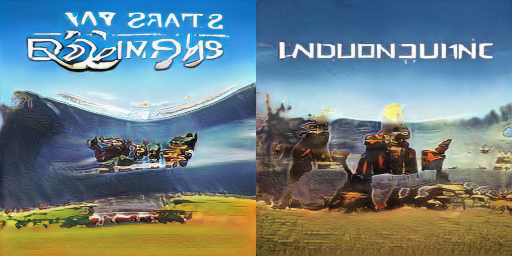

Seed: 0024


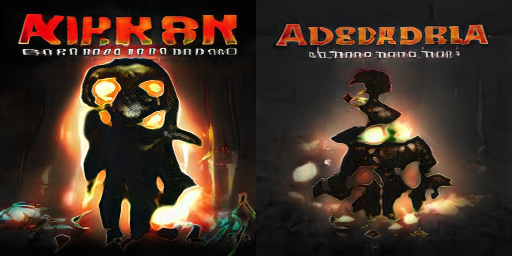

Seed: 0036


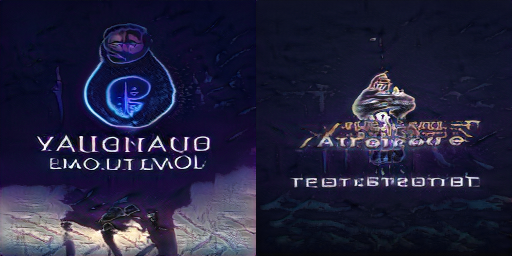

Seed: 0041


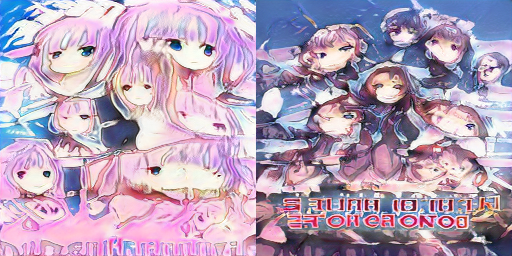

Seed: 0084


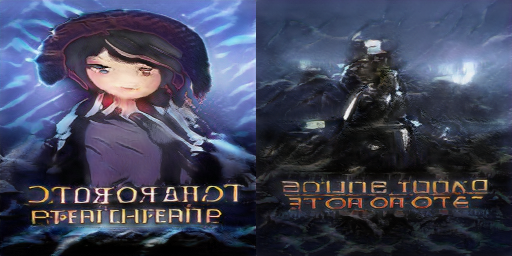

Seed: 0112


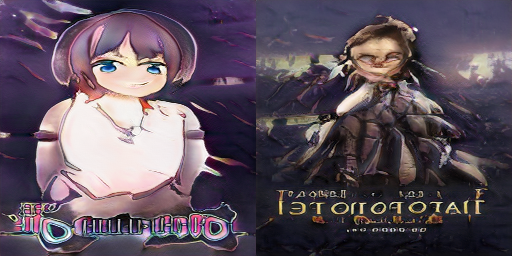

Seed: 0208


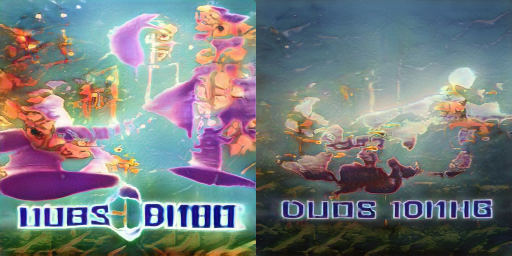

Seed: 0237


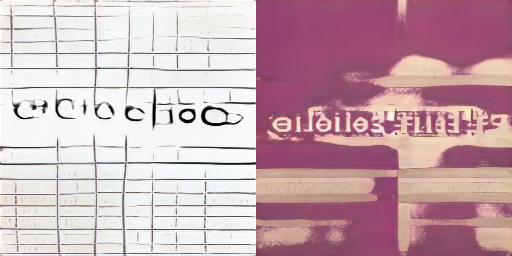

Seed: 0261


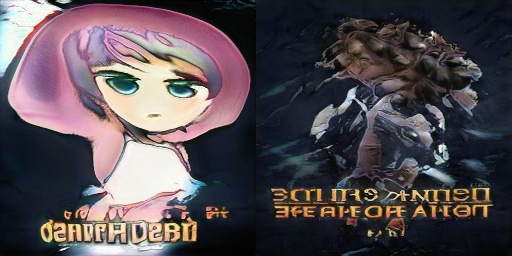

Seed: 0266


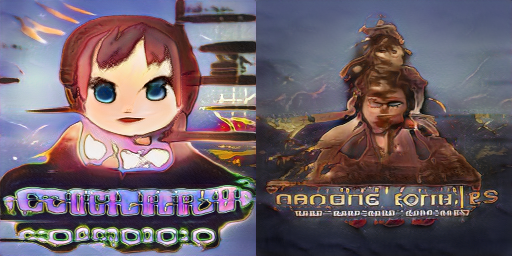

Seed: 0312


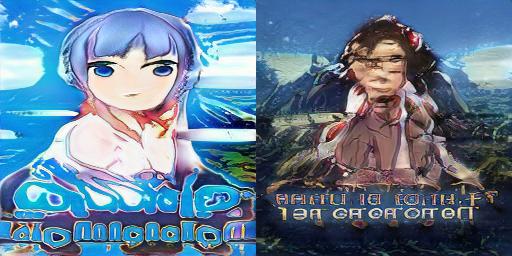

Seed: 0322


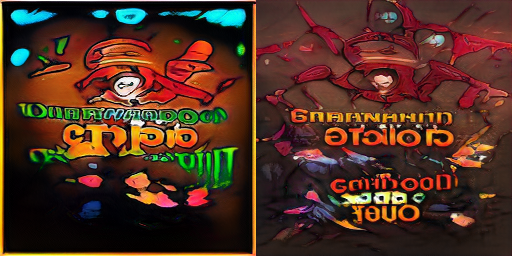

Seed: 0368


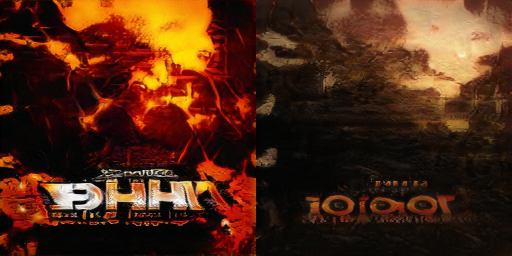

Seed: 0382


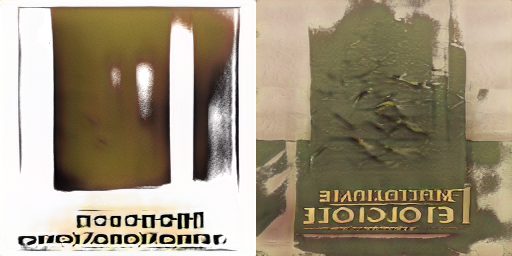

Seed: 0393


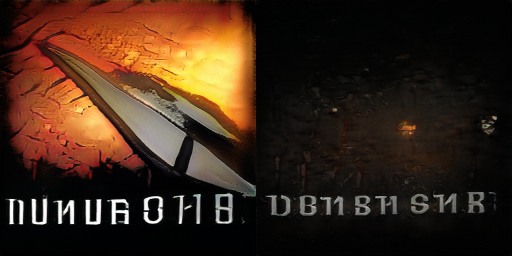

Seed: 0422


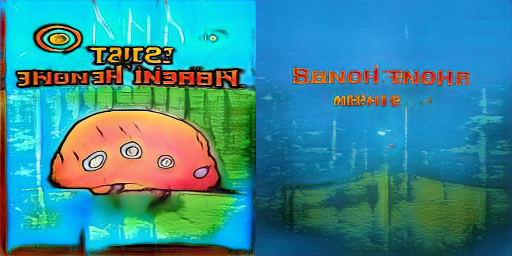

Seed: 0424


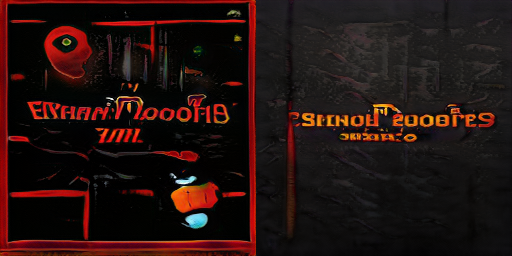

Seed: 0478


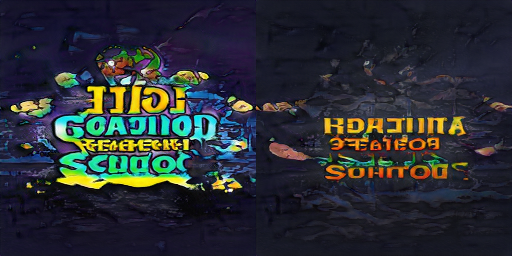

Seed: 0552


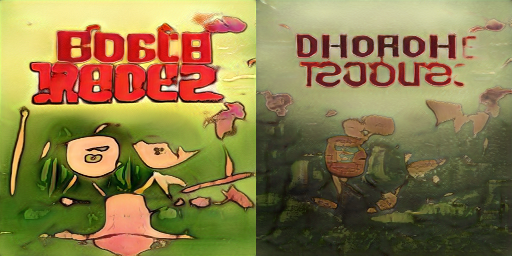

Seed: 0586


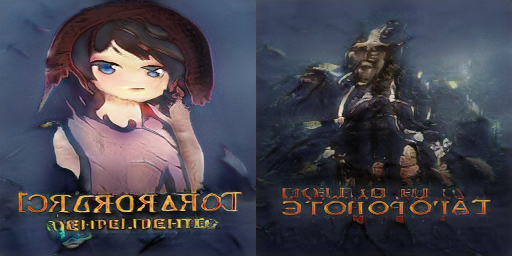

Seed: 0651


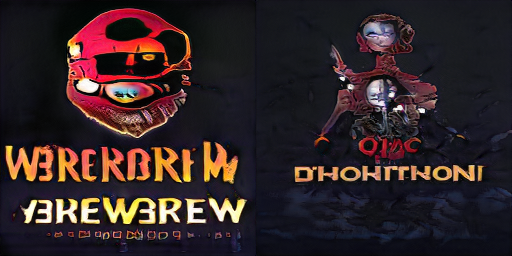

Seed: 0875


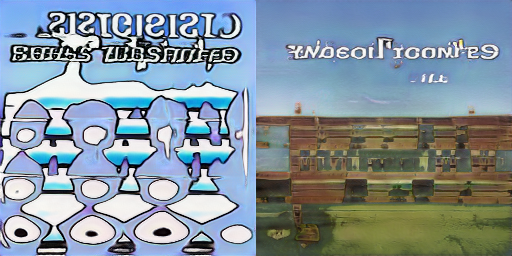

Seed: 0939


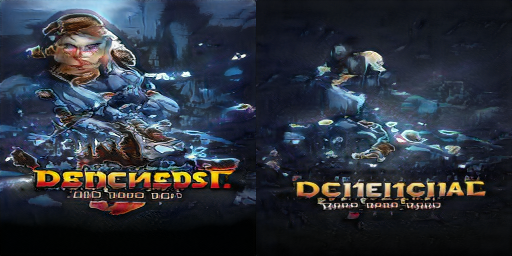

Seed: 0956


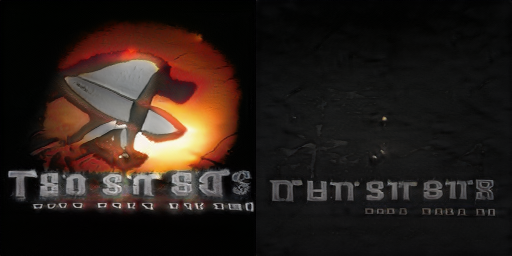

Seed: 0977


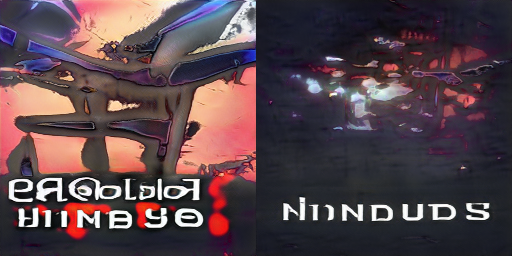

In [38]:
import imageio
import IPython.display

for seed_no in interesting_seeds:
  print('Seed: {:04d}'.format(seed_no))

  base_file_name = 'seed{:04d}.png'.format(seed_no)

  file_name_1 = folder_without_truncation + base_file_name
  file_name_2 = folder_with_truncation + base_file_name

  image_1 = imageio.imread(file_name_1)
  image_2 = imageio.imread(file_name_2)

  canvas = concatenate_images(image_1,
                              image_2)
  
  if save_to_disk:
    output_file_name = output_folder + base_file_name
    canvas.save(output_file_name)

  if display_to_screen:
    IPython.display.display(canvas)


### Style mixing, using the final snapshot

NB: in previous versions of this notebook, I was using the default values:
- `--row-seeds=85,100,75,458,1500`
- `--col-seeds=55,821,1789,293`

#### Without truncation

In [41]:
!python stylegan2/run_generator.py style-mixing-example \
  --row-seeds=1,41,208,322,424,939 \
  --col-seeds=1,41,208,322,424,939 \
  --truncation-psi=1.0 \
  --network=results/{result_folder_name_to_load}/network-final.pkl \
  --result-dir='/content/drive/My Drive/results' \

Local submit - run_dir: /content/drive/My Drive/results/00061-style-mixing-example
dnnlib: Running run_generator.style_mixing_example() on localhost...
Loading networks from "results/00055-stylegan2-steam-1gpu-config-e/network-final.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
Generating W vectors...
Generating images...
Generating style-mixed images...
Saving images...
Saving image grid...
dnnlib: Finished run_generator.style_mixing_example() in 58s.


#### With truncation

In [42]:
!python stylegan2/run_generator.py style-mixing-example \
  --row-seeds=1,41,208,322,424,939 \
  --col-seeds=1,41,208,322,424,939 \
  --truncation-psi=0.5 \
  --network=results/{result_folder_name_to_load}/network-final.pkl \
  --result-dir='/content/drive/My Drive/results' \

Local submit - run_dir: /content/drive/My Drive/results/00062-style-mixing-example
dnnlib: Running run_generator.style_mixing_example() on localhost...
Loading networks from "results/00055-stylegan2-steam-1gpu-config-e/network-final.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating W vectors...
Generating images...
Generating style-mixed images...
Saving images...
Saving image grid...
dnnlib: Finished run_generator.style_mixing_example() in 16s.


### Projection to latent space, using the final snapshot

#### Load all of the possible target images into a folder called `/content/256x256/`

Data consists of 14,035 vertical Steam banners, resized from 300x450 to 256x256 resolution.

In [43]:
colab_transfer.copy_file(file_name='256x256.zip')

Copying /content/drive/My Drive/256x256.zip to /content/256x256.zip


In [0]:
!unzip 256x256.zip -d /content/

#### Move the target images into the folder expected by StyleGAN2

In [45]:
target_image_app_ids = [
                        570, # Dota 2
                        578080, # PLAYERUNKNOWN'S BATTLEGROUNDS
                        440, # Team Fortress 2
                        730, # Counter-Strike: Global Offensive
                        304930, # Unturned
                        550, # Left 4 Dead 2
                        4000, # Garry's Mod
                        240, # Counter-Strike: Source
                        10, # Counter-Strike
                        620, # Portal 2
                        400, # Portal
                        72850, # The Elder Scrolls V: Skyrim
                        271590, # Grand Theft Auto V
                        220, # Half-Life 2
                        105600, # Terraria
                        252950, # Rocket League®
                        60, # Ricochet
                        70, # Half-Life
                        863550, # HITMAN™ 2
                        292030, # The Witcher® 3: Wild Hunt
                        377160, # Fallout 4
                        8870, # BioShock Infinite
                        48000, # LIMBO
]

anime_app_ids = [
                 236090, 282900, 324160, 331470, 337340, 344770, 351640, 400910,
                 413410, 1243670, 413420, 429660, 948740, 447530, 495890,
                 559210, 623080, 698780, 745880, 774171, 787480, 315810, 
                 1162560, 303310, 412830, 798460, 410890, 472870, 526490,
                 577480, 668350, 550340, 406550, 639490, 310360, 1034940,
                 567640, 825630, 1144400, 1202540, 913740, 1171370, 1161870, 
                 1168470, 1189630, 1178050, 1232180, 1216080, 991270, 960690, 
                 1252320, 1162070, 1111370, 1260810
                 ]

target_image_app_ids += anime_app_ids

print('#images={}'.format(
    len(target_image_app_ids))
)

#images=77


In [46]:
!mkdir -p /content/img/

for app_id in target_image_app_ids:
  # Reference: https://stackoverflow.com/a/40932507
  !echo cp /content/256x256/{app_id}.jpg /content/img/
  !cp /content/256x256/{app_id}.jpg /content/img/


cp /content/256x256/570.jpg /content/img/
cp /content/256x256/578080.jpg /content/img/
cp /content/256x256/440.jpg /content/img/
cp /content/256x256/730.jpg /content/img/
cp /content/256x256/304930.jpg /content/img/
cp /content/256x256/550.jpg /content/img/
cp /content/256x256/4000.jpg /content/img/
cp /content/256x256/240.jpg /content/img/
cp /content/256x256/10.jpg /content/img/
cp /content/256x256/620.jpg /content/img/
cp /content/256x256/400.jpg /content/img/
cp /content/256x256/72850.jpg /content/img/
cp /content/256x256/271590.jpg /content/img/
cp /content/256x256/220.jpg /content/img/
cp /content/256x256/105600.jpg /content/img/
cp /content/256x256/252950.jpg /content/img/
cp /content/256x256/60.jpg /content/img/
cp /content/256x256/70.jpg /content/img/
cp /content/256x256/863550.jpg /content/img/
cp /content/256x256/292030.jpg /content/img/
cp /content/256x256/377160.jpg /content/img/
cp /content/256x256/8870.jpg /content/img/
cp /content/256x256/48000.jpg /content/img/
cp /con

#### Preparing datasets

In [47]:
!python stylegan2/dataset_tool.py create_from_images '/content/datasets/real' '/content/img'

Loading images from "/content/img"
Creating dataset "/content/datasets/real"
Added 64 images.


#### Projecting images to latent space

In [49]:
!python stylegan2/run_projector.py project-real-images \
 --data-dir='/content/datasets' --dataset=real \
 --num-images=64 \
 --network=results/{result_folder_name_to_load}/network-final.pkl \
 --result-dir='/content/drive/My Drive/results' \
 --num-snapshots=5 \


Local submit - run_dir: /content/drive/My Drive/results/00064-project-real-images
dnnlib: Running run_projector.project_real_images() on localhost...
Loading networks from "results/00055-stylegan2-steam-1gpu-config-e/network-final.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from "real"...
tcmalloc: large alloc 4294967296 bytes == 0x53184000 @  0x7fc568c11001 0x7fc566735765 0x7fc566799bb0 0x7fc56679ba4f 0x7fc566832048 0x50a635 0x50cd96 0x507d64 0x509042 0x594931 0x549e5f 0x5513d1 0x59fc4e 0x50d356 0x507d64 0x509a90 0x50a48d 0x50cd96 0x507d64 0x588e5c 0x59fc4e 0x50d356 0x509758 0x50a48d 0x50bfb4 0x509758 0x50a48d 0x50bfb4 0x507d64 0x588e5c 0x59fc4e
tcmalloc: large alloc 4294967296 bytes == 0x7fc32d700000 @  0x7fc568c0f1e7 0x7fc5667355e1 0x7fc566799c78 0x7fc566799f37 0x7fc566831f28 0x50a635 0x50cd96 0x507d64 0x509a90 0x50a48d 0x50cd96 0x507d64 0x50